In [63]:
import numpy as np
import pandas as pd
import pandas_profiling
import statistics

import time
from sklearn.preprocessing import Imputer

pd.set_option('display.max_columns', 150)

In [64]:
df = pd.read_csv('application_train.csv')

# Business Understanding

In the money lending industry one key question persist, will money borrowers pay back?
Home credit, a financial services company wants the kaggle community to help them  acurately answer this business problem using machine learning. Their primary goal is to extend safe and smooth lending services to people who have sparse credit histories or who have been unable to open traditional banking accounts. 

For the unbanked traditional, data such as  FICO credit score of the borrower, number of days the borrower has had a credit line and  borrower’s number of inquiries by creditors in the last 6 months cannot be used to determine loan eligibilty.Non traditional data will be ideal in this case. Home credits has provided a data set  wih non traditonal data points  in the data set __application_train/application_test.csv__ . 

With this data set our team will attempt to use supervised learning to predcit whether a borrower is likely to pay back money borrowed.

# Data Understanding

### Data Meaning Type
In this section we will provide a brief description of each attribute and it corresponding datatype.

In [65]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [66]:
df.shape

(307511, 122)

In [67]:
pd.set_option('display.max_row', 1000)
df.dtypes

SK_ID_CURR                        int64
TARGET                            int64
NAME_CONTRACT_TYPE               object
CODE_GENDER                      object
FLAG_OWN_CAR                     object
FLAG_OWN_REALTY                  object
CNT_CHILDREN                      int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
NAME_TYPE_SUITE                  object
NAME_INCOME_TYPE                 object
NAME_EDUCATION_TYPE              object
NAME_FAMILY_STATUS               object
NAME_HOUSING_TYPE                object
REGION_POPULATION_RELATIVE      float64
DAYS_BIRTH                        int64
DAYS_EMPLOYED                     int64
DAYS_REGISTRATION               float64
DAYS_ID_PUBLISH                   int64
OWN_CAR_AGE                     float64
FLAG_MOBIL                        int64
FLAG_EMP_PHONE                    int64
FLAG_WORK_PHONE                   int64


There are three unique data types present in this dataset:
1. Object - Represents categorical data. Ex "Cash loan"
2. Int64 - Represents whole number counts for non continuous values. Ex "Number of Children" or Binary (0 and 1)
3. Float64 - Represents contiuous values. Ex. "Amount of Annuity"

In [68]:
# Summary of object type columns
object_df = df.select_dtypes(include=['object'])

data = []
for col in object_df:
    unique_array = object_df[col].unique()
    data.append({'column_name': col, 'value_count': len(unique_array), 'values': unique_array})

object_df = pd.DataFrame(data)
object_df.style.set_properties(subset=['values'], **{'width': '700px'})

,column_name,value_count,values
0,NAME_CONTRACT_TYPE,2,['Cash loans' 'Revolving loans']
1,CODE_GENDER,3,['M' 'F' 'XNA']
2,FLAG_OWN_CAR,2,['N' 'Y']
3,FLAG_OWN_REALTY,2,['Y' 'N']
4,NAME_TYPE_SUITE,8,"['Unaccompanied' 'Family' 'Spouse, partner' 'Children' 'Other_A' nan 'Other_B' 'Group of people']"
5,NAME_INCOME_TYPE,8,['Working' 'State servant' 'Commercial associate' 'Pensioner' 'Unemployed' 'Student' 'Businessman' 'Maternity leave']
6,NAME_EDUCATION_TYPE,5,['Secondary / secondary special' 'Higher education' 'Incomplete higher' 'Lower secondary' 'Academic degree']
7,NAME_FAMILY_STATUS,6,['Single / not married' 'Married' 'Civil marriage' 'Widow' 'Separated' 'Unknown']
8,NAME_HOUSING_TYPE,6,['House / apartment' 'Rented apartment' 'With parents' 'Municipal apartment' 'Office apartment' 'Co-op apartment']
9,OCCUPATION_TYPE,19,['Laborers' 'Core staff' 'Accountants' 'Managers' nan 'Drivers' 'Sales staff' 'Cleaning staff' 'Cooking staff' 'Private service staff' 'Medicine staff' 'Security staff' 'High skill tech staff' 'Waiters/barmen staff' 'Low-skill Laborers' 'Realty agents' 'Secretaries' 'IT staff' 'HR staff']


Above is a breakdown of the Object type columns. Each print output dispalys the column name, the unique values, and the number of unique values.

In [69]:
#Summary of int64 type columns
object_df = df.select_dtypes(include=['int64'])

object_df.describe().round(1)

,SK_ID_CURR,TARGET,CNT_CHILDREN,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
count,307511.0,307511.0,307511.0,307511.0,307511.0,307511.0,307511.0,307511.0,307511.0,307511.0,307511.0,307511.0,307511.0,307511.0,307511.0,307511.0,307511.0,307511.0,307511.0,307511.0,307511.0,307511.0,307511.0,307511.0,307511.0,307511.0,307511.0,307511.0,307511.0,307511.0,307511.0,307511.0,307511.0,307511.0,307511.0,307511.0,307511.0,307511.0,307511.0,307511.0,307511.0
mean,278180.5,0.1,0.4,-16037.0,63815.0,-2994.2,1.0,0.8,0.2,1.0,0.3,0.1,2.1,2.0,12.1,0.0,0.1,0.0,0.1,0.2,0.2,0.0,0.7,0.0,0.0,0.1,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,102790.2,0.3,0.7,4364.0,141275.8,1509.5,0.0,0.4,0.4,0.0,0.4,0.2,0.5,0.5,3.3,0.1,0.2,0.2,0.3,0.4,0.4,0.0,0.5,0.0,0.1,0.3,0.0,0.3,0.1,0.0,0.1,0.0,0.1,0.1,0.0,0.1,0.0,0.1,0.0,0.0,0.0
min,100002.0,0.0,0.0,-25229.0,-17912.0,-7197.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,189145.5,0.0,0.0,-19682.0,-2760.0,-4299.0,1.0,1.0,0.0,1.0,0.0,0.0,2.0,2.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,278202.0,0.0,0.0,-15750.0,-1213.0,-3254.0,1.0,1.0,0.0,1.0,0.0,0.0,2.0,2.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,367142.5,0.0,1.0,-12413.0,-289.0,-1720.0,1.0,1.0,0.0,1.0,1.0,0.0,2.0,2.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,456255.0,1.0,19.0,-7489.0,365243.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,3.0,23.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


Above is a breakdown of summary statistics for Int64 type columns.

In [70]:
#Summary of float64 type columns
object_df = df.select_dtypes(include=['float64'])

object_df.describe().round(0)

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_REGISTRATION,OWN_CAR_AGE,CNT_FAM_MEMBERS,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.0,307511.0,307499.0,307233.0,307511.0,307511.0,104582.0,307509.0,134133.0,306851.0,246546.0,151450.0,127568.0,157504.0,103023.0,92646.0,143620.0,152683.0,154491.0,98869.0,124921.0,97312.0,153161.0,93997.0,137829.0,151450.0,127568.0,157504.0,103023.0,92646.0,143620.0,152683.0,154491.0,98869.0,124921.0,97312.0,153161.0,93997.0,137829.0,151450.0,127568.0,157504.0,103023.0,92646.0,143620.0,152683.0,154491.0,98869.0,124921.0,97312.0,153161.0,93997.0,137829.0,159080.0,306490.0,306490.0,306490.0,306490.0,307510.0,265992.0,265992.0,265992.0,265992.0,265992.0,265992.0
mean,168798.0,599026.0,27109.0,538396.0,0.0,-4986.0,12.0,2.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,-963.0,0.0,0.0,0.0,0.0,0.0,2.0
std,237123.0,402491.0,14494.0,369446.0,0.0,3523.0,12.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,2.0,0.0,827.0,0.0,0.0,0.0,1.0,1.0,2.0
min,25650.0,45000.0,1616.0,40500.0,0.0,-24672.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-4292.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,112500.0,270000.0,16524.0,238500.0,0.0,-7480.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1570.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,147150.0,513531.0,24903.0,450000.0,0.0,-4504.0,9.0,2.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-757.0,0.0,0.0,0.0,0.0,0.0,1.0
75%,202500.0,808650.0,34596.0,679500.0,0.0,-2010.0,15.0,3.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,2.0,0.0,-274.0,0.0,0.0,0.0,0.0,0.0,3.0
max,117000000.0,4050000.0,258026.0,4050000.0,0.0,0.0,91.0,20.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,348.0,34.0,344.0,24.0,0.0,4.0,9.0,8.0,27.0,261.0,25.0


Above is a breakdown of summary statistics for Float64 type columns.

### Data Quality

This section will highlight any issues that were discovered with the data and the approach that was taken to address those issues. Since there are 122 columns in the dataset we wanted carefully assess whether each column is needed. There were three main issues in the dataset that required cleanup: highly correlated columns, columns with missing values (9.6% of the dataset had missing values), and columns with NA values. Each of these will be addressed in more detail.

<IPython.core.display.Javascript object>


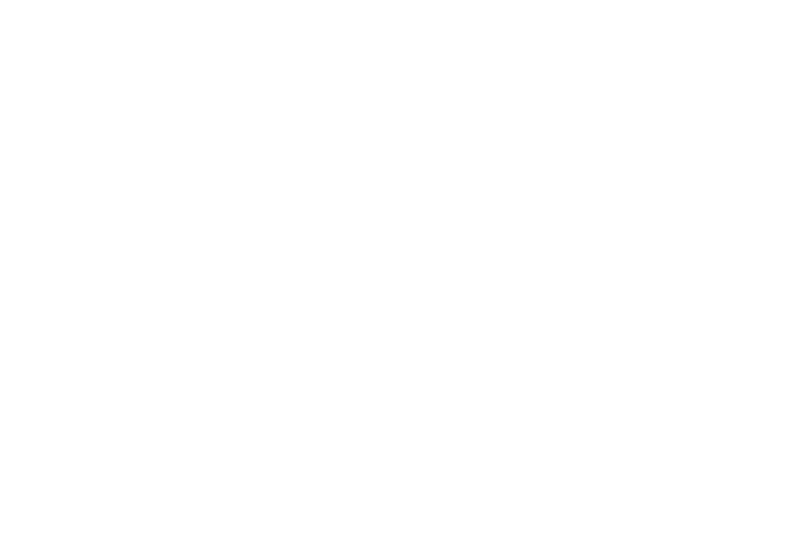

<IPython.core.display.Javascript object>


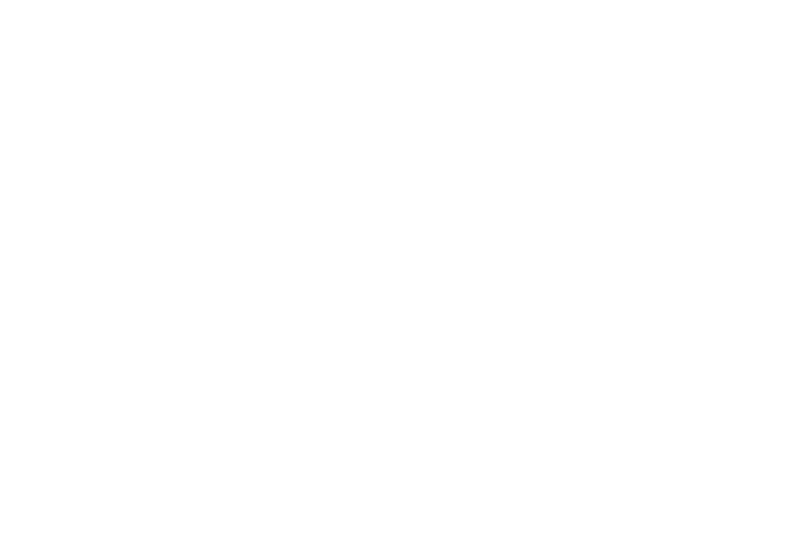

Number of variables,122
Number of observations,307511
Total Missing (%),9.6%
Total size in memory,286.2 MiB
Average record size in memory,976.0 B
Numeric,39
Categorical,16
Boolean,33
Date,0
Text (Unique),0
Rejected,34


In [71]:
# Write Data Profiling File

profile = pandas_profiling.ProfileReport(df)
profile.to_file(outputfile="profile_report.html")
profile

#### Highly Correlated Columns

Often times input features are correlated, meaning that they depend on each another and carry similar meaning. Thus removing one of those features does not impact the ability to perform analysis. In fact, it ususally helps reduce over inflation of standard errors which increases the likelyhood of including variables in a model where they would be excluded.

In [72]:
# drop all columns that pandas profiling indicates that should be removed because of correlation.
columns_to_drop=['AMT_GOODS_PRICE','APARTMENTS_MEDI','APARTMENTS_MODE','BASEMENTAREA_MEDI','BASEMENTAREA_MODE','COMMONAREA_MEDI','COMMONAREA_MODE','ELEVATORS_MEDI','ELEVATORS_MODE','ENTRANCES_MEDI','ENTRANCES_MODE','FLAG_DOCUMENT_10','FLAG_DOCUMENT_12','FLAG_DOCUMENT_13','FLAG_DOCUMENT_14','FLAG_DOCUMENT_15','FLAG_DOCUMENT_16','FLAG_DOCUMENT_17','FLAG_DOCUMENT_19','FLAG_DOCUMENT_2','FLAG_DOCUMENT_20','FLAG_DOCUMENT_21','FLOORSMAX_MEDI','FLOORSMAX_MODE','FLOORSMIN_MEDI','FLOORSMIN_MODE','LANDAREA_MEDI','LANDAREA_MODE','LIVINGAPARTMENTS_AVG','LIVINGAPARTMENTS_MEDI','LIVINGAPARTMENTS_MODE','LIVINGAREA_AVG','LIVINGAREA_MEDI','LIVINGAREA_MODE','NONLIVINGAPARTMENTS_MEDI','NONLIVINGAPARTMENTS_MODE','NONLIVINGAREA_MEDI','NONLIVINGAREA_MODE','OBS_60_CNT_SOCIAL_CIRCLE','REGION_RATING_CLIENT_W_CITY','TOTALAREA_MODE','YEARS_BEGINEXPLUATATION_MEDI','YEARS_BEGINEXPLUATATION_MODE','YEARS_BUILD_MEDI','YEARS_BUILD_MODE']
drop_columns_df = pd.DataFrame({'column_name_that_will_be_dropped': columns_to_drop})
print (drop_columns_df)
df = df.drop(columns_to_drop, axis=1)

   column_name_that_will_be_dropped
0                   AMT_GOODS_PRICE
1                   APARTMENTS_MEDI
2                   APARTMENTS_MODE
3                 BASEMENTAREA_MEDI
4                 BASEMENTAREA_MODE
5                   COMMONAREA_MEDI
6                   COMMONAREA_MODE
7                    ELEVATORS_MEDI
8                    ELEVATORS_MODE
9                    ENTRANCES_MEDI
10                   ENTRANCES_MODE
11                 FLAG_DOCUMENT_10
12                 FLAG_DOCUMENT_12
13                 FLAG_DOCUMENT_13
14                 FLAG_DOCUMENT_14
15                 FLAG_DOCUMENT_15
16                 FLAG_DOCUMENT_16
17                 FLAG_DOCUMENT_17
18                 FLAG_DOCUMENT_19
19                  FLAG_DOCUMENT_2
20                 FLAG_DOCUMENT_20
21                 FLAG_DOCUMENT_21
22                   FLOORSMAX_MEDI
23                   FLOORSMAX_MODE
24                   FLOORSMIN_MEDI
25                   FLOORSMIN_MODE
26                    LANDAR

After reviewing the pearson correlation values and recommendations from the profiling report, we decided to remove those variables with a high degree of correlation. Fourty-five columns with >.9 correlation values were removed from the dataset. This reduction helps reduce some of the complexity without greatly impacting the modeling ability.

### Handling Columns with Lots of Missing Values

In [73]:
# Function that finds missing values:
def num_missing(x):
  return sum(x.isnull())

In [74]:
# Applying for missing columns:
print("Missing values per column:")
print(df.apply(num_missing, axis=0))

Missing values per column:
SK_ID_CURR                          0
TARGET                              0
NAME_CONTRACT_TYPE                  0
CODE_GENDER                         0
FLAG_OWN_CAR                        0
FLAG_OWN_REALTY                     0
CNT_CHILDREN                        0
AMT_INCOME_TOTAL                    0
AMT_CREDIT                          0
AMT_ANNUITY                        12
NAME_TYPE_SUITE                  1292
NAME_INCOME_TYPE                    0
NAME_EDUCATION_TYPE                 0
NAME_FAMILY_STATUS                  0
NAME_HOUSING_TYPE                   0
REGION_POPULATION_RELATIVE          0
DAYS_BIRTH                          0
DAYS_EMPLOYED                       0
DAYS_REGISTRATION                   0
DAYS_ID_PUBLISH                     0
OWN_CAR_AGE                    202929
FLAG_MOBIL                          0
FLAG_EMP_PHONE                      0
FLAG_WORK_PHONE                     0
FLAG_CONT_MOBILE                    0
FLAG_PHONE             

In [75]:
# Drop columns with large numbers of missing values. These potentially could be interpreted together and combinded into
# columns that may have meaning. However that may introduce a lot more complexity and for now we have made the decisison
# to drop them. All columns here have more than 100,000 missing values.
lots_of_missing_values = ['OWN_CAR_AGE', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 
                        'LANDAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'FONDKAPREMONT_MODE',
                        'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE', 'EXT_SOURCE_1',
                        'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG',
                        'COMMONAREA_AVG']
lots_of_missing_values_df = pd.DataFrame({'column_name_that_will_be_dropped': lots_of_missing_values})
print (lots_of_missing_values_df)
df = df.drop(lots_of_missing_values, axis=1)

   column_name_that_will_be_dropped
0                       OWN_CAR_AGE
1                     ELEVATORS_AVG
2                     ENTRANCES_AVG
3                     FLOORSMAX_AVG
4                     FLOORSMIN_AVG
5                      LANDAREA_AVG
6           NONLIVINGAPARTMENTS_AVG
7                 NONLIVINGAREA_AVG
8                FONDKAPREMONT_MODE
9                    HOUSETYPE_MODE
10               WALLSMATERIAL_MODE
11              EMERGENCYSTATE_MODE
12                     EXT_SOURCE_1
13                   APARTMENTS_AVG
14                 BASEMENTAREA_AVG
15      YEARS_BEGINEXPLUATATION_AVG
16                  YEARS_BUILD_AVG
17                   COMMONAREA_AVG


Removed columns with >100,000 missing values. The reason this was done instead of setting a value for missing is that it would greatly skew the meaning of these factors. For example, OWN_CAR_AGE of missing could imply that it was never collected or it could imply that the person did not have a car. These sorts of decisions are difficult to make and since there are lots of columns in this dataset we decided to remove them for now. In the future, we may impute these values or create new columns that may better represent the data.

#### Imputing Missing Values

In [76]:
# Applying for missing columns:
print("Missing values per column:")
print(df.apply(num_missing, axis=0))

Missing values per column:
SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                       12
NAME_TYPE_SUITE                 1292
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
DAYS_REGISTRATION                  0
DAYS_ID_PUBLISH                    0
FLAG_MOBIL                         0
FLAG_EMP_PHONE                     0
FLAG_WORK_PHONE                    0
FLAG_CONT_MOBILE                   0
FLAG_PHONE                         0
FLAG_EMAIL                         0
OCCUPATION_

In [77]:
# fill missing values in columns that are objects with unknown. 
df['NAME_TYPE_SUITE'].fillna('Unknown', inplace=True)
df['OCCUPATION_TYPE'].fillna('Unknown', inplace=True)

NAME_TYPE_SUITE and OCCUPATION_TYPE are the only two categorical variables that still have missing values. For these we decided to create a new class called "Unknown". This was done because we could, if necessary, explain that as it own entity for further investigation.

In [78]:
# Applying for missing columns:
print("Missing values per column:")
print(df.apply(num_missing, axis=0))

Missing values per column:
SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                       12
NAME_TYPE_SUITE                    0
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
DAYS_REGISTRATION                  0
DAYS_ID_PUBLISH                    0
FLAG_MOBIL                         0
FLAG_EMP_PHONE                     0
FLAG_WORK_PHONE                    0
FLAG_CONT_MOBILE                   0
FLAG_PHONE                         0
FLAG_EMAIL                         0
OCCUPATION_

In [79]:
# Fill NaN values with the median of the column.

columns_to_impute = ['AMT_ANNUITY', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'CNT_FAM_MEMBERS', 'DAYS_LAST_PHONE_CHANGE', 'OBS_30_CNT_SOCIAL_CIRCLE',
                    'DEF_30_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
                    'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']
columns_to_impute_df = pd.DataFrame({'column_name_that_will_be_imputed': columns_to_impute})
print (columns_to_impute_df)
for column in columns_to_impute:
    df[column].fillna((df[column].median()), inplace=True)

   column_name_that_will_be_imputed
0                       AMT_ANNUITY
1                      EXT_SOURCE_2
2                      EXT_SOURCE_3
3                   CNT_FAM_MEMBERS
4            DAYS_LAST_PHONE_CHANGE
5          OBS_30_CNT_SOCIAL_CIRCLE
6          DEF_30_CNT_SOCIAL_CIRCLE
7          DEF_60_CNT_SOCIAL_CIRCLE
8        AMT_REQ_CREDIT_BUREAU_HOUR
9         AMT_REQ_CREDIT_BUREAU_DAY
10       AMT_REQ_CREDIT_BUREAU_WEEK
11        AMT_REQ_CREDIT_BUREAU_MON
12        AMT_REQ_CREDIT_BUREAU_QRT
13       AMT_REQ_CREDIT_BUREAU_YEAR


Here we are taking a look at the rest of the variables which are all ints or floats. Here we decided to impute the median for each respective missing value. The reason we chose to do that is that we did not want to use the average because outliers would have a more profound impact. Thus we chose the median as a simple imputation technique for now. However, this is open for change based off further analysis and more sophisticated imputation techniques such as Expectation-Maximization can be attempted.

In [80]:
print("Missing values per column:")
print(df.apply(num_missing, axis=0))

Missing values per column:
SK_ID_CURR                     0
TARGET                         0
NAME_CONTRACT_TYPE             0
CODE_GENDER                    0
FLAG_OWN_CAR                   0
FLAG_OWN_REALTY                0
CNT_CHILDREN                   0
AMT_INCOME_TOTAL               0
AMT_CREDIT                     0
AMT_ANNUITY                    0
NAME_TYPE_SUITE                0
NAME_INCOME_TYPE               0
NAME_EDUCATION_TYPE            0
NAME_FAMILY_STATUS             0
NAME_HOUSING_TYPE              0
REGION_POPULATION_RELATIVE     0
DAYS_BIRTH                     0
DAYS_EMPLOYED                  0
DAYS_REGISTRATION              0
DAYS_ID_PUBLISH                0
FLAG_MOBIL                     0
FLAG_EMP_PHONE                 0
FLAG_WORK_PHONE                0
FLAG_CONT_MOBILE               0
FLAG_PHONE                     0
FLAG_EMAIL                     0
OCCUPATION_TYPE                0
CNT_FAM_MEMBERS                0
REGION_RATING_CLIENT           0
WEEKDAY_APPR_PRO

In [81]:
# df.to_csv('imputed_cleaned_train_data.csv', sep=',')

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 59 columns):
SK_ID_CURR                     307511 non-null int64
TARGET                         307511 non-null int64
NAME_CONTRACT_TYPE             307511 non-null object
CODE_GENDER                    307511 non-null object
FLAG_OWN_CAR                   307511 non-null object
FLAG_OWN_REALTY                307511 non-null object
CNT_CHILDREN                   307511 non-null int64
AMT_INCOME_TOTAL               307511 non-null float64
AMT_CREDIT                     307511 non-null float64
AMT_ANNUITY                    307511 non-null float64
NAME_TYPE_SUITE                307511 non-null object
NAME_INCOME_TYPE               307511 non-null object
NAME_EDUCATION_TYPE            307511 non-null object
NAME_FAMILY_STATUS             307511 non-null object
NAME_HOUSING_TYPE              307511 non-null object
REGION_POPULATION_RELATIVE     307511 non-null float64
DAYS_BIRTH              

After cleaning we have no more columns with NA values and have reduced our dataset down to 59 dimensions.

# Data Exploration with PCA

We explore the relationships between features using PCA below. Specifically, we want to know if there are certain correlations among features that allows us to reduce our dimensions by combining those features into 'composite' features. Since PCA should only be applied to quantitative variables (because the numerical difference between dummy-encoded categorical variables has no real meaning in terms of linear algebraic distance), we apply PCA to a subset of our data frame that contains only non-object data types.

In [83]:
# We call notebook twice to avoid a bug.
%matplotlib notebook
%matplotlib notebook
import matplotlib.pyplot as plt

In [84]:
# Pull only non-categorical columns.
dfX = df.loc[:,df.dtypes!=object]
dfY = dfX['TARGET'] # pull out target variable

# Drop ID and target from X.
dfX = dfX.drop(['SK_ID_CURR','TARGET'], 1)

# Show X columns.
dfX.head()

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_11,FLAG_DOCUMENT_18,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,0,202500.0,406597.5,24700.5,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,1.0,2,10,0,0,0,0,0,0,0.262949,0.139376,2.0,2.0,2.0,-1134.0,1,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,0,270000.0,1293502.5,35698.5,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,2.0,1,11,0,0,0,0,0,0,0.622246,0.535276,1.0,0.0,0.0,-828.0,1,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,67500.0,135000.0,6750.0,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,1.0,2,9,0,0,0,0,0,0,0.555912,0.729567,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,135000.0,312682.5,29686.5,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,2.0,2,17,0,0,0,0,0,0,0.650442,0.535276,2.0,0.0,0.0,-617.0,1,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
4,0,121500.0,513000.0,21865.5,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,1.0,2,11,0,0,0,0,1,1,0.322738,0.535276,0.0,0.0,0.0,-1106.0,0,0,0,0,0,1,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


## PCA Computation

We perform PCA using scikit-learn below. Before applying PCA, we standardize our features to have mean 0 and variance 1; this is necessary because PCA's computation of variance would give larger-scale features excessive influence on the transformation if they were not standardized.

From the below, we see that the first five principal components combined explain only 27.7% of the total variation in the data, with the largest principal component explaining just 9.02% of the variance. The output of the below cell is an array that shows the percentage of variance explained by the first five principal components.

In [85]:
# Standardize the features in the dataframe (to mean zero and standard deviation 1).
from sklearn.preprocessing import StandardScaler
std_sc = StandardScaler() # instantiate the class
dfX_std = std_sc.fit_transform(dfX) # transform the data

from sklearn.decomposition import PCA
pca = PCA()
dfX_pca = pca.fit_transform(dfX_std)

# The amount of variance explained from the first 5 principal components.
pca.explained_variance_ratio_[0:5]/np.sum(pca.explained_variance_ratio_)


array([0.09020874, 0.05468487, 0.04927756, 0.04473611, 0.03835738])

In order to increase our intuition about PCA, we also decided to implement PCA from scratch (using lower-level logic in place of the scikit-learn library). To do this, we performed the following steps.

1. We used our standardized features (with mean 0 and standard deviation 1) to compute the covariance matrix. Since our mean is 0, we were then able to apply a simple equation: (1/n-1) * np.dot(X.T, X) to compute the covariance matrix using vectorized logic. Note that n is the number of observations, and X is our features matrix with shape (number of observations, number of columns).


2. We then extracted the eigenvalues and related eigenvectors from an eigendecomposition of the covariance matrix. We did this using a simple linear algebra function (since the eigendecomposition is somewhat complex).


3. We sorted the eigenvalues (along with their related eigenvectors) in order from largest magnitude to smallest.


4. We decided to look at the top three principal components, so we concatenated the top three eigenvectors (based on their eigenvalues) vertically into a matrix. This functions as our projection matrix with shape of (number of features, number of principal components).


5. To obtain the principal components of an observation, we calculate the dot product between our observation and our projection matrix.


In [86]:
# 1. Compute covariance matrix.
cov = (1/(dfX_std.shape[0]-1)) * np.dot(dfX_std.T, dfX_std)

# 2. Perform eigendecomposition on covariance matrix.
eigenvals, eigenvecs = np.linalg.eig(cov)

# 3. Sort the eigenvectors based on the largest eigvalues.
eigenlist = [(eigenvals[i], eigenvecs[:, i]) for i in range(0, len(eigenvals))] # create a list of tuples of eigenvalue,
    # eigenvector pairs.
eigenlist.sort(key=lambda tup: tup[0], reverse=True) # sort the list

# 4. Create the projection matrix of the top three eigenvectors. The projection matrix has shape (num features, num
    # of principal components). We take the dot product between this and the feature matrix to get the principal
    # components for each observation.
proj_mat = (np.vstack((eigenlist[0][1], eigenlist[1][1], eigenlist[2][1]))).T

# 5. Transform the observations.
pca_vals = np.dot(dfX_std, proj_mat)

The below shows the top three principal components for the first 10 observations (for both the scikit-learn and our manual implementation). Since these values are the same, this shows that our manual implementation of PCA is correct.

In [87]:
print('Scikit PCA: ', dfX_pca[0:10,0:3], '\nManual PCA: ', pca_vals[0:10])

Scikit PCA:  [[ 0.48986397 -2.28777145 -0.7530691 ]
 [ 0.6007346   0.87519794  1.62004489]
 [-0.72509524 -0.64807015 -0.63724276]
 [-0.37023987 -0.13979352  0.53052381]
 [ 0.46944532  0.85738264 -1.595316  ]
 [ 0.51821268  0.31162372  1.08009989]
 [ 1.3391182   2.08006108  2.76818388]
 [ 1.62908471  0.44900821 -0.12982321]
 [-2.69072597  0.246492   -0.00617277]
 [-1.17754061  0.18423452  0.18995215]] 
Manual PCA:  [[ 0.48986397 -2.28777145 -0.7530691 ]
 [ 0.6007346   0.87519794  1.62004489]
 [-0.72509524 -0.64807015 -0.63724276]
 [-0.37023987 -0.13979352  0.53052381]
 [ 0.46944532  0.85738264 -1.595316  ]
 [ 0.51821268  0.31162372  1.08009989]
 [ 1.3391182   2.08006108  2.76818388]
 [ 1.62908471  0.44900821 -0.12982321]
 [-2.69072597  0.246492   -0.00617277]
 [-1.17754061  0.18423452  0.18995215]]


As mentioned at the beginning of the section, the top five principal components together explain only 27.7% of the variance in the dataset. Since this is only a quarter of the variance, there is some doubt about whether a graph of our principal components will be able to separate out the two classes of our response variable. Since graphs typically only allow us to plot two or three dimensions at a time, there is some constraint in how we can visually disambiguate a complex dataset (as opposed to analytically doing so).

We go ahead and plot the data based on the values of the top two principal components only. Based on the below graph, it appears that the first two principal components are not enough to separate out the response class, as there is a lot of overlap between the two classes on these two principal components. Note that we plot only a small subset of our data (based on a stratified random sample) in order not to over-crowd the graph.

<IPython.core.display.Javascript object>


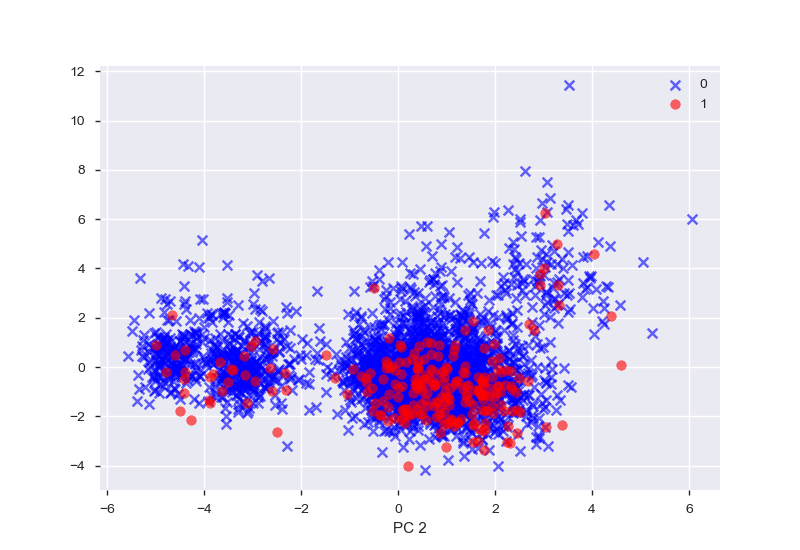

In [88]:
# In order not to over-crowd our visualization, we take a stratified random sample of points to plot in our
# visualization.
from sklearn.model_selection import train_test_split
visX_pca, otherX_pca, visY, otherY = train_test_split(dfX_pca, dfY, test_size=0.99, stratify=dfY, random_state=0)

colors = ['blue', 'red']
markers = ['x', 'o']
for i, l in enumerate(np.unique(visY)):
    plt.scatter(visX_pca[visY==l,0], visX_pca[visY==l,1], color=colors[i], marker=markers[i], alpha=0.6, label=l)
plt.xlabel('PC 1')
plt.xlabel('PC 2')
plt.legend(loc='best')

Since the top two principal components do not appear to be enough to separate out the two levels of the response variable, we go ahead and plot the third principal component in a three-dimensional plot below.

Based on the below plot, it appears there's a little more separation between the two classes, but not enough that would allow a classifier to accurately predict the target variable without concern of greatly overfitting the model.

To summarize our PCA findings, we would conclude that the dataset is complex enough that a few principal components alone are not enough to create an accurate classification model. At the very least, we would look to using categorical variables and other methods (such as polynomial or similarity features) to improve a future model that we might want to develop.

<IPython.core.display.Javascript object>


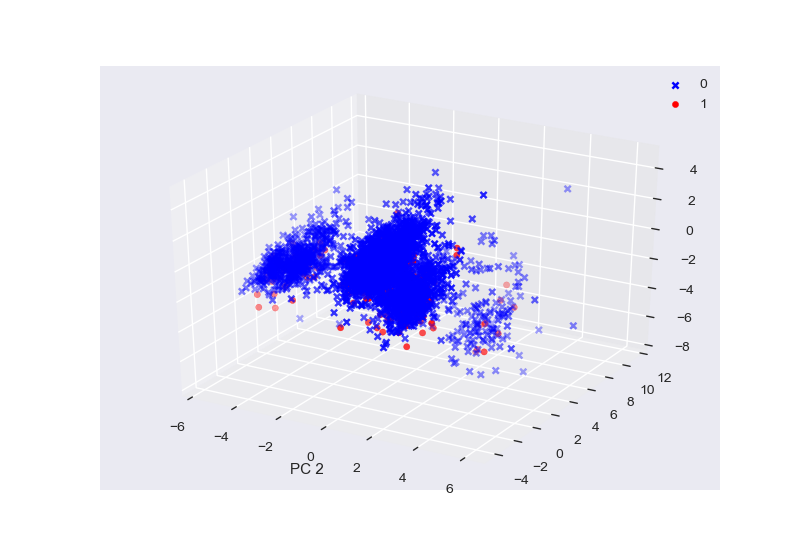

In [89]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for l, c, m in zip(np.unique(visY), colors, markers):
    ax.scatter(visX_pca[visY==l,0], visX_pca[visY==l,1], visX_pca[visY==l,2], color=c, marker=m, label=l)
plt.xlabel('PC 1')
plt.xlabel('PC 2')
plt.legend(loc='best')